# Forward D4DX4 scheme

Used close to inner x processor boundaries. The following scheme is 2nd order convergent.

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, together, as_finite_diff, simplify
from sympy import Function, Eq, S

init_printing()

In [2]:
x = symbols('x')
h = symbols('h', positive=True)

f = Function('f')

# Stencils
stencil = [x-h, x, x+h, x+2*h ,x+3*h, x+4*h]

We are here discretizing the equation

$$ \partial_\rho^4 f$$

### Calculate the finite difference approximation of $\partial_x^4 f$

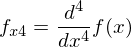

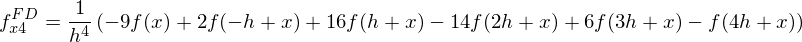

(-9*f(x) + 2*f(-h + x) + 16*f(h + x) - 14*f(2*h + x) + 6*f(3*h + x) - f(4*h + x))/h**4


In [3]:
fx4 = f(x).diff(x,4)
fx4FD = as_finite_diff(fx4, stencil)
display(Eq(symbols('f_x4'), fx4))
display(Eq(symbols('f^FD_x4'), together(fx4FD)))
print(together(fx4FD))

# Calculating the order

Let's call the Taylor expansions of $f$ for $T[f(x,a)] = \sum_{n=0}^\infty\frac{f^{(n)}(a)}{n!}(x-a)^n$

In [4]:
x0 = symbols('x0')
terms = 7

Taylor expasion of $f$ expanded around $a=x_0-h$ evaluated in $x=x_0$

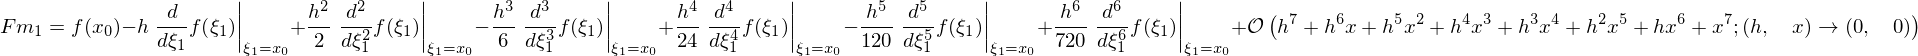

In [5]:
Fm1 = f(x-h).series(x-h, x0=x0, n=terms)
Fm1 = Fm1.subs(x-x0,0)
display(Eq(symbols('Fm1'),Fm1))

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x_0$

In [6]:
F = f(x).series(x, x0=x0, n=terms)
F = F.subs(x-x0,0)
display(Eq(symbols('F'),F))

Taylor expasion of $f$ expanded around $a=x_0+h$ evaluated in $x=x_0$

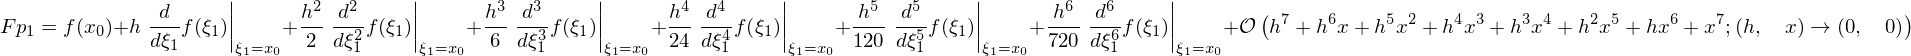

In [7]:
Fp1 = f(x+h).series(x+h, x0=x0, n=terms)
Fp1 = Fp1.subs(x-x0,0)
display(Eq(symbols('Fp1'),Fp1))

Taylor expasion of $f$ expanded around $a=x_0+2h$ evaluated in $x=x_0$

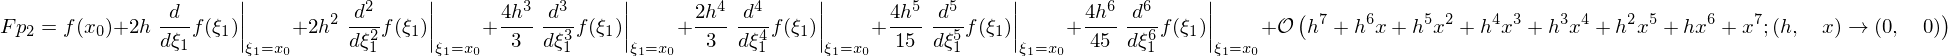

In [8]:
Fp2 = f(x+2*h).series(x+2*h, x0=x0, n=terms)
Fp2 = Fp2.subs(x-x0,0)
display(Eq(symbols('Fp2'),Fp2))

Taylor expasion of $f$ expanded around $a=x_0+3h$ evaluated in $x=x_0$

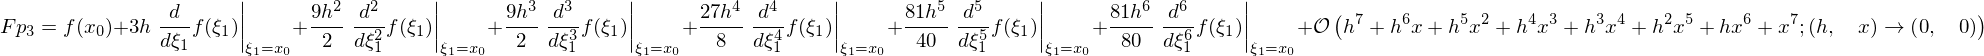

In [9]:
Fp3 = f(x+3*h).series(x+3*h, x0=x0, n=terms)
Fp3 = Fp3.subs(x-x0,0)
display(Eq(symbols('Fp3'),Fp3))

Taylor expasion of $f$ expanded around $a=x_0+4h$ evaluated in $x=x_0$

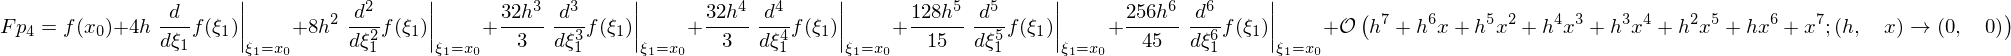

In [10]:
Fp4 = f(x+4*h).series(x+4*h, x0=x0, n=terms)
Fp4 = Fp4.subs(x-x0,0)
display(Eq(symbols('Fp4'),Fp4))

Substitute into the FD scheme

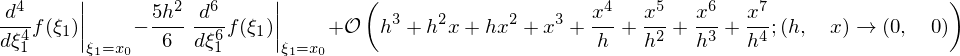

In [11]:
fx4FDT = fx4FD.subs([
                     (f(x-h)  , Fm1),
                     (f(x)    , F  ),
                     (f(x+h)  , Fp1),
                     (f(x+2*h), Fp2),
                     (f(x+3*h), Fp3),
                     (f(x+4*h), Fp4),                                         
                    ])
display(simplify(fx4FDT))

Thus, we see that this discretization is 2nd order accurate.